In [ ]:
#TASK1

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.6580 - loss: 44.7817 - precision: 0.6591 - val_accuracy: 0.8810 - val_loss: 1836921.8750 - val_precision: 0.8810 - learning_rate: 1.0000
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8123 - loss: 93.3626 - precision: 0.8123 - val_accuracy: 0.9039 - val_loss: 611243.5625 - val_precision: 0.9039 - learning_rate: 1.1220
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8539 - loss: 104.9584 - precision: 0.8539 - val_accuracy: 0.9099 - val_loss: 133224.4531 - val_precision: 0.9099 - learning_rate: 1.2589
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8639 - loss: 92.3160 - precision: 0.8639 - val_accuracy: 0.9459 - val_loss: 20346886.0000 - val_precision: 0.9459 - learning_rate: 1.4125
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8883 - loss: 118.8866 - precision: 0.8883 - val_accuracy: 0.9396 - val_loss: 17607964.0000 - val_precisi

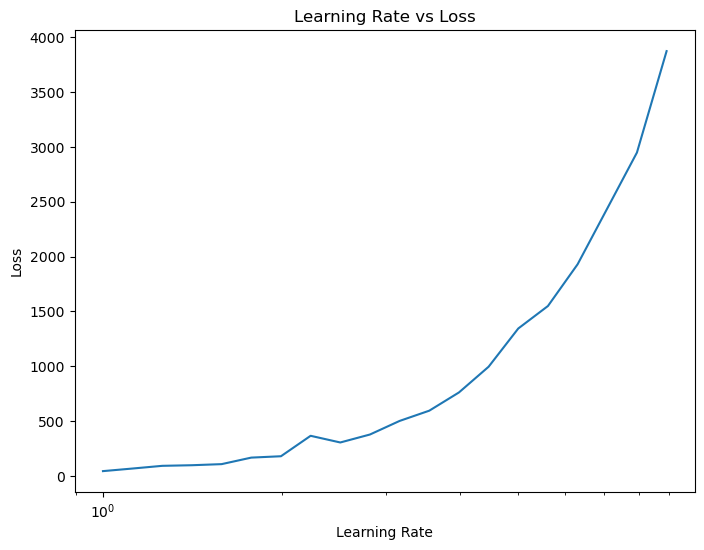

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.8679 - loss: 0.4261 - precision_1: 0.9062 - val_accuracy: 0.9627 - val_loss: 0.1145 - val_precision_1: 0.9679
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9492 - loss: 0.1660 - precision_1: 0.9575 - val_accuracy: 0.9683 - val_loss: 0.1005 - val_precision_1: 0.9731
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9582 - loss: 0.1347 - precision_1: 0.9645 - val_accuracy: 0.9747 - val_loss: 0.0811 - val_precision_1: 0.9783
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9652 - loss: 0.1095 - precision_1: 0.9698 - val_accuracy: 0.9759 - val_loss: 0.0763 - val_precision_1: 0.9785
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9682 - loss: 0.0985 - precision_1: 0.9730 - val_accuracy: 0.9771 - val_loss: 0.0730 - val_precision_1: 0.9806
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9727 - loss: 0.0880 - precision_1

In [5]:
#Import librarirs 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import LearningRateScheduler, TensorBoard
import datetime

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize and reshape data
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Convert labels to categorical
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Define MLP model
def create_model():
    model = keras.Sequential([
        keras.layers.Dense(512, activation='relu', input_shape=(784,)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Learning rate search function
def lr_schedule(epoch):
    return 10 ** (epoch / 20)  # Exponential increase in LR

model = create_model()
model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision()])

# TensorBoard setup
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train model to find optimal LR
lr_scheduler = LearningRateScheduler(lr_schedule)
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[lr_scheduler, tensorboard_callback])

# Plot LR vs. loss
lrs = [lr_schedule(i) for i in range(20)]
losses = history.history['loss']
plt.figure(figsize=(8, 6))
plt.semilogx(lrs, losses)
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")
plt.show()

# Train final model with optimal LR
optimal_lr = 0.001  # Adjust based on the previous plot
final_model = create_model()
final_model.compile(optimizer=keras.optimizers.Adam(learning_rate=optimal_lr), loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision()])
final_model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test), callbacks=[tensorboard_callback])

# Evaluate final model
final_results = final_model.evaluate(x_test, y_test)
final_accuracy = final_results[1]
final_precision = final_results[2]
print(f"Final Test Accuracy: {final_accuracy * 100:.2f}%")
print(f"Final Test Precision: {final_precision * 100:.2f}%")


In [ ]:
#TASK2

Training with sigmoid activation
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 17ms/step - accuracy: 0.1000 - loss: 2.3113 - val_accuracy: 0.1000 - val_loss: 2.3039
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.0975 - loss: 2.3079 - val_accuracy: 0.1000 - val_loss: 2.3055
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.0989 - loss: 2.3064 - val_accuracy: 0.1000 - val_loss: 2.3039
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.1027 - loss: 2.3044 - val_accuracy: 0.1000 - val_loss: 2.3035
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.0991 - loss: 2.3033 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.1003 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.0999 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3

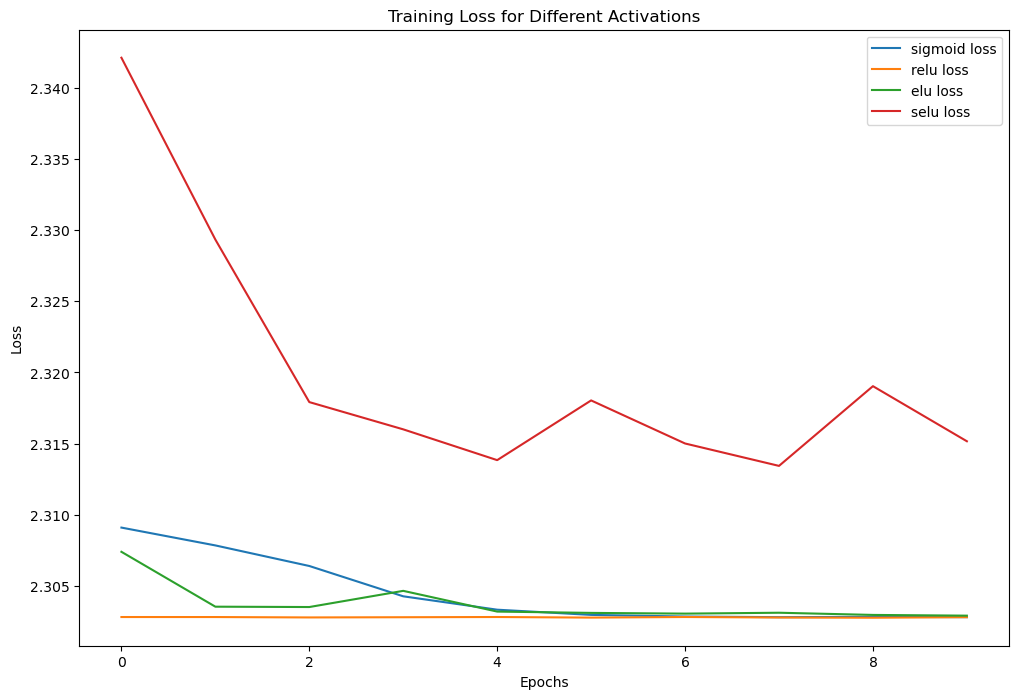


Discussion on Vanishing/Exploding Gradients:
- Sigmoid: Prone to vanishing gradients due to saturation in extreme values.
- ReLU: Helps mitigate vanishing gradients but can suffer from dead neurons.
- ELU: Similar to ReLU but helps prevent dead neurons by allowing small negative values.
- SELU: Designed to self-normalize and mitigate both vanishing and exploding gradients.


In [9]:
#Import librarirs 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Function to create a deep neural network with 100 hidden layers
def create_model(activation):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))  # Flatten the input image to a vector
    
    # Add 100 hidden layers with the specified activation function
    for _ in range(100):
        model.add(keras.layers.Dense(64, activation=activation))
    
    model.add(keras.layers.Dense(10, activation='softmax'))  # Output layer for classification
    return model

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize data to scale pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoded format
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Define different activation functions for comparison
activations = ['sigmoid', 'relu', 'elu', 'selu']
history_dict = {}

# Train and evaluate the model using each activation function
for activation in activations:
    print(f"Training with {activation} activation")
    model = create_model(activation)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)
    history_dict[activation] = history.history  # Store training history

# Plot loss curves for different activation functions
plt.figure(figsize=(12, 8))
for activation in activations:
    plt.plot(history_dict[activation]['loss'], label=f'{activation} loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss for Different Activations')
plt.legend()
plt.show()

# Discussion on vanishing/exploding gradients
print("\nDiscussion on Vanishing/Exploding Gradients:")
print("- Sigmoid: Prone to vanishing gradients due to saturation in extreme values.")
print("- ReLU: Helps mitigate vanishing gradients but can suffer from dead neurons.")
print("- ELU: Similar to ReLU but helps prevent dead neurons by allowing small negative values.")
print("- SELU: Designed to self-normalize and mitigate both vanishing and exploding gradients.")

In [ ]:
#TASK3

Training with sgd optimizer
Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.1782 - loss: 2.4925 - val_accuracy: 0.2940 - val_loss: 2.0045
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.2908 - loss: 1.9888 - val_accuracy: 0.3437 - val_loss: 1.8451
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3248 - loss: 1.8857 - val_accuracy: 0.3668 - val_loss: 1.7813
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.3430 - loss: 1.8306 - val_accuracy: 0.3796 - val_loss: 1.7359
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3599 - loss: 1.7902 - val_accuracy: 0.3908 - val_loss: 1.7112
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.3663 - loss: 1.7624 - val_accuracy: 0.3914 - val_loss: 1.6990
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.3852 - loss: 1.7261 - val_accuracy: 0.4200 - val_loss: 1.6403
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step 

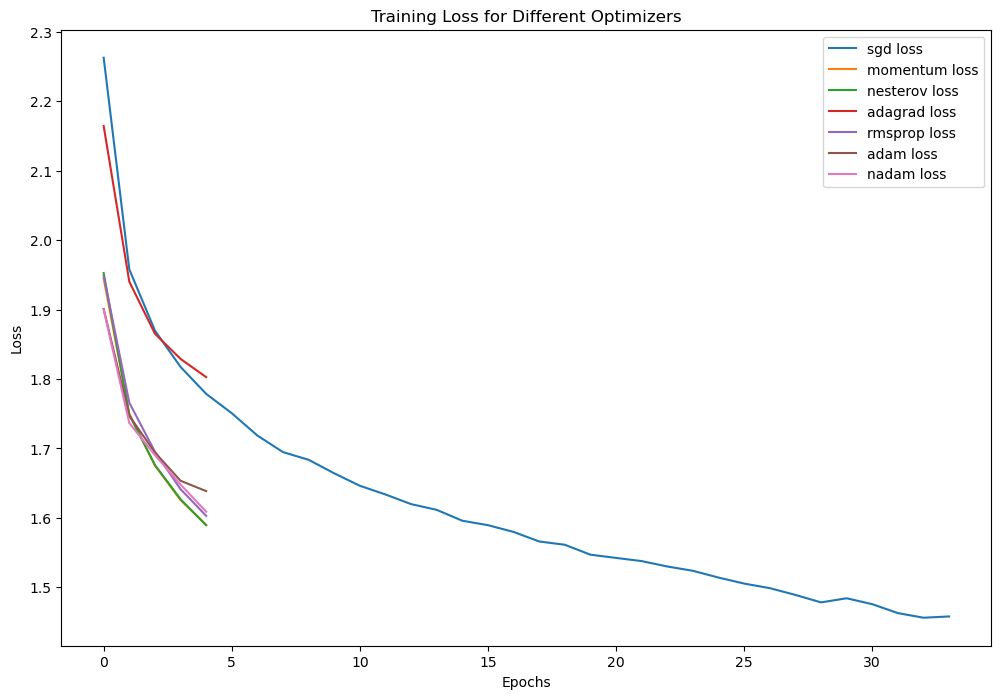


Discussion on Optimization Techniques:
- SGD: Slower convergence due to constant learning rate.
- Momentum: Accelerates SGD by adding velocity to gradients.
- Nesterov: Improves momentum by looking ahead before updating.
- AdaGrad: Adapts learning rate but slows down over time.
- RMSProp: Balances learning rate adaptation.
- Adam: Combines momentum and adaptive learning rates for efficient training.
- Nadam: Adam with Nesterov acceleration for potentially better convergence.


In [10]:
#Import librarirs 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize data to scale pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoded format
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Function to create a deep neural network with 20 hidden layers of 100 neurons each
def create_model(batch_norm=False):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(32, 32, 3)))  # Flatten image input
    
    for _ in range(20):
        model.add(keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'))
        if batch_norm:
            model.add(keras.layers.BatchNormalization())  # Add Batch Normalization if enabled
    
    model.add(keras.layers.Dense(10, activation='softmax'))  # Output layer for classification
    return model

# Define a callback for early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train and compare models with and without Batch Normalization
optimizers = ['sgd', 'momentum', 'nesterov', 'adagrad', 'rmsprop', 'adam', 'nadam']
training_results = {}

for optimizer in optimizers:
    print(f"Training with {optimizer} optimizer")
    if optimizer == 'momentum':
        opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
    elif optimizer == 'nesterov':
        opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
    elif optimizer == 'adagrad':
        opt = keras.optimizers.Adagrad(learning_rate=0.001)
    elif optimizer == 'rmsprop':
        opt = keras.optimizers.RMSprop(learning_rate=0.001)
    elif optimizer == 'adam':
        opt = keras.optimizers.Adam(learning_rate=0.001)
    elif optimizer == 'nadam':
        opt = keras.optimizers.Nadam(learning_rate=0.001)
    else:
        opt = keras.optimizers.SGD(learning_rate=0.001)
    
    model = create_model(batch_norm=True)  # Enable batch normalization
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=1)
    training_results[optimizer] = history.history

# Plot loss curves for different optimizers
plt.figure(figsize=(12, 8))
for optimizer in optimizers:
    plt.plot(training_results[optimizer]['loss'], label=f'{optimizer} loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss for Different Optimizers')
plt.legend()
plt.show()

# Discussion on optimizers
print("\nDiscussion on Optimization Techniques:")
print("- SGD: Slower convergence due to constant learning rate.")
print("- Momentum: Accelerates SGD by adding velocity to gradients.")
print("- Nesterov: Improves momentum by looking ahead before updating.")
print("- AdaGrad: Adapts learning rate but slows down over time.")
print("- RMSProp: Balances learning rate adaptation.")
print("- Adam: Combines momentum and adaptive learning rates for efficient training.")
print("- Nadam: Adam with Nesterov acceleration for potentially better convergence.")
